In [1]:
import pytesseract
import time
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
import numpy as np
import pandas as pd
import scapegoat as bst
import Red_Black as rbt
import AVL_Tree as avl
pytesseract.pytesseract.tesseract_cmd = r'C:\\OCR\\tesseract.exe'

In [48]:
foodTree_1 = bst.ScapeGoatTree(0.2)
foodTree_2 = bst.ScapeGoatTree(0.5)
foodTree_3 = bst.ScapeGoatTree(0.8)
foodrbt = rbt.RedBlackTree()
foodavl = avl.AVLTree()
Ingredients_List = []

col_list = ["Ingredients"]
df = pd.read_csv('ingredients.csv', usecols=col_list) 
char_ignore = '.*[](): '
for x in range(len(df['Ingredients'])):
    ing = df['Ingredients'][x]
    if type(ing)==str:
        for y in ing.split(','):
            y = ''.join([i for i in y if i.isalpha()]).replace(' ','')
            every = [y,y.upper(),y.lower()]
            if len(set(every).intersection(set(Ingredients_List))) == 0 and len(y) > 2 and y[0] not in char_ignore and y[-1] not in char_ignore and len(y) < 15 and list(filter((y.lower()+'prefix').startswith, Ingredients_List)) == []:
                appender = y.lower()
                Ingredients_List.append(appender)
                foodTree_1.insert(appender)
                foodTree_2.insert(appender)
                foodTree_3.insert(appender)
                foodavl.insert(appender)
                foodrbt.insert(appender)

In [49]:
Ingredients_4 = ['water', 'sugar', 'eggs', 'starch', 'salt', 'preservative', 'potassium', 'stabilizer', 'xanthan', 'gum', 'sequestrant', 'disodium', 'edta']

In [50]:
timer_array = []
start = time.perf_counter_ns()
for x in Ingredients_4:
    dummy = x in Ingredients_List
    timer_array.append(time.perf_counter_ns() - start)

In [51]:
timer_RBT = []
start = time.perf_counter_ns()
for item in Ingredients_4:
        treeItem = foodrbt.searchTree(item)
        timer_RBT.append(time.perf_counter_ns() - start)

In [52]:
timer_AVL = []
start = time.perf_counter_ns()
for item in Ingredients_4:
        treeItem = foodavl.searchTree(item)
        timer_AVL.append(time.perf_counter_ns() - start)

In [53]:
def Search(Tree,key):
    x = Tree.root
    while x != None:
        #print(x.key,key)
        if x.key > key:
            x = x.left
        elif x.key < key:
            x = x.right
        else:
            return x.key
    return x

In [54]:
timer_sgt_1 = []
start = time.perf_counter_ns()
for item in Ingredients_4:
        treeItem = Search(foodTree_1,item)
        timer_sgt_1.append(time.perf_counter_ns() - start)

In [55]:
timer_sgt_2 = []
start = time.perf_counter_ns()
for item in Ingredients_4:
        treeItem = Search(foodTree_2,item)
        timer_sgt_2.append(time.perf_counter_ns() - start)

In [56]:
timer_sgt_3 = []
start = time.perf_counter_ns()
for item in Ingredients_4:
        treeItem = Search(foodTree_3,item)
        timer_sgt_3.append(time.perf_counter_ns() - start)

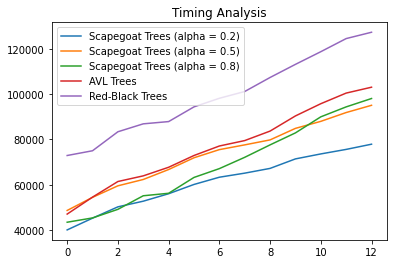

In [57]:
plt.figure()
plt.title("Timing Analysis")
plt.plot(timer_sgt_1)
plt.plot(timer_sgt_2)
plt.plot(timer_sgt_3)
plt.plot(timer_AVL)
plt.plot(timer_RBT)
plt.legend(["Scapegoat Trees (alpha = 0.2)","Scapegoat Trees (alpha = 0.5)","Scapegoat Trees (alpha = 0.8)","AVL Trees","Red-Black Trees"])
plt.show()